In [1]:
import pandas as pd
import numpy as np
import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import math

Read in data

In [96]:
results = pd.read_csv('experiment_nonlin_3_t_sep_results.csv')
wish_results = pd.read_csv('wishart_experiment_1_t_sep_results.csv')
wish_results = pd.read_csv('wishart_experiment_3_t_sep_results.csv')

In [66]:
results.loc[results['trueneg'] == 1, 'truepos'] = 3
results.loc[results['trueneg'] == 1, 'trueneg'] = 0

,train_lin,b,d,KME,E,K,n_samples,n_distributions,score,trueneg,falseneg,truepos,falsepos
0,[False],0.01,0.01,4,100,100,50,100,1.0,0,0,3,0
1,[False],0.01,0.01,4,100,100,50,100,1.0,0,0,3,0
2,[False],0.01,0.01,4,100,100,50,100,1.0,0,0,3,0
3,[False],0.01,0.01,4,100,100,50,100,1.0,0,0,3,0
4,[False],0.01,0.01,4,100,100,50,100,1.0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43195,[False],0.05,0.05,4,1000,1000,1000,1000,1.0,0,0,3,0
43196,[False],0.05,0.05,4,1000,1000,1000,1000,1.0,0,0,3,0
43197,[False],0.05,0.05,4,1000,1000,1000,1000,1.0,0,0,3,0
43198,[False],0.05,0.05,4,1000,1000,1000,1000,1.0,0,0,3,0


Import KME results in correct format and extract true positive and false positive rates.

In [49]:
results_mean = results.groupby(['b','d','KME','E','K','n_samples','n_distributions']).mean()
results_mean.insert(1, 'acc_std', results.groupby(['b','d','KME','E','K','n_samples','n_distributions'])[['score']].std())

true_pos = results_mean['truepos'] / (results_mean['truepos'] + results_mean['falseneg'])
false_pos = results_mean['falsepos'] / (results_mean['falsepos'] + results_mean['trueneg'])

#print(results_mean.reset_index().to_markdown())

Import Wishart results in correct format and extract true positive and false positive rates.

In [97]:
wish_results_lin = wish_results[wish_results['linear'] == True] 
wish_results_nonlin = wish_results[wish_results['linear'] == False] 

wish_results_lin_mean = wish_results_lin.groupby(['b','d','nsamples']).mean()
wish_results_lin_mean.insert(2, 'acc_std', wish_results_lin.groupby(['b','d','nsamples'])[['accuracy']].std())
wish_results_nonlin_mean = wish_results_nonlin.groupby(['b','d','nsamples']).mean()
wish_results_nonlin_mean.insert(2, 'acc_std', wish_results_nonlin.groupby(['b','d','nsamples'])[['accuracy']].std())

true_pos_wish_lin = wish_results_lin_mean['truepos'] / (wish_results_lin_mean['truepos'] + wish_results_lin_mean['falseneg'])
false_pos_wish_lin = wish_results_lin_mean['falsepos'] / (wish_results_lin_mean['falsepos'] + wish_results_lin_mean['trueneg'])
true_pos_wish_nonlin = wish_results_nonlin_mean['truepos'] / (wish_results_nonlin_mean['truepos'] + wish_results_nonlin_mean['falseneg'])
false_pos_wish_nonlin = wish_results_nonlin_mean['falsepos'] / (wish_results_nonlin_mean['falsepos'] + wish_results_nonlin_mean['trueneg'])

#Remove NaN values
true_pos_wish_lin[np.isnan(true_pos_wish_lin)] = 0
true_pos_wish_nonlin[np.isnan(true_pos_wish_nonlin)] = 0
false_pos_wish_lin[np.isnan(false_pos_wish_lin)] = 0
false_pos_wish_nonlin[np.isnan(false_pos_wish_nonlin)] = 0

### Graph displaying the True Positive Rate and False Positive Rate of the KME and Wishart test with different hyperparameters

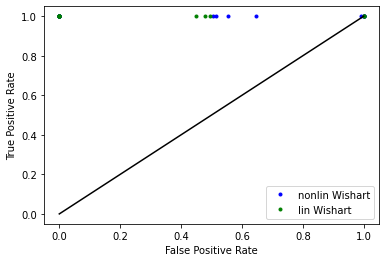

In [98]:
#plt.plot(false_pos,true_pos, 'r.',label='KME')    
plt.plot(false_pos_wish_nonlin, true_pos_wish_nonlin, 'b.',label='nonlin Wishart')
plt.plot(false_pos_wish_lin,true_pos_wish_lin,'g.', label='lin Wishart')
plt.plot([0,1],'k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()